<a href="https://colab.research.google.com/github/aryalekshmiI/Data-Science-and-Machine-Learning/blob/main/Customer_Analysis_with_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Customer Analysis**

**GOALS**

The objective of this projectis to build a model, using historical data Focus on all steps of data science (EDA, data processing, model, evaluation, charts)
1.	Highlight any trend in data, deep insight, novel steps that you take
2.	Highlight next steps and improvements.
3.	Apply classification and clustering machine learning algorithms and evaluate it.  
Customer analysis helps to improve its products based on its target customers from different types of customer segments.

**Data call**

In [ ]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline
from google.colab import files
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [ ]:
#Loading data

url = "https://raw.githubusercontent.com/aryalekshmiI/Data-Science-and-Machine-Learning/main/customer_train.csv"
df = pd.read_csv(url)
df.head()

,Unnamed: 0.1,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,...,7,0,0,0,0,0,0,3,11,1
1,1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,...,5,0,0,0,0,0,0,3,11,0
2,2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,...,4,0,0,0,0,0,0,3,11,0
3,3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,...,6,0,0,0,0,0,0,3,11,0
4,4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,...,5,0,0,0,0,0,0,3,11,0


**Data Dictionary**


1.   ***People***

● ID: Customer's unique identifier

● Year_Birth: Customer's birth year

● Education: Customer's education level

● Marital_Status: Customer's marital status

● Income: Customer's yearly household income

● Kidhome: Number of children in customer's household

● Teenhome: Number of teenagers in customer's household

● Dt_Customer: Date of customer's enrollment with the company

● Recency: Number of days since customer's last purchase

● Complain: 1 if the customer complained in the last 2 years, 0 otherwise
2.   ***Products***

● MntWines: Amount spent on wine in last 2 years

● MntFruits: Amount spent on fruits in last 2 years

● MntMeatProducts: Amount spent on meat in last 2 years

● MntFishProducts: Amount spent on fish in last 2 years

● MntSweetProducts: Amount spent on sweets in last 2 years

● MntGoldProds: Amount spent on gold in last 2 years


3.   ***Promotion***

● NumDealsPurchases: Number of purchases made with a discount

● AcceptedCmp1: 1 if customer accepted the offer in the 1st campaign, 0 otherwise

● AcceptedCmp2: 1 if customer accepted the offer in the 2nd campaign, 0 otherwise

● AcceptedCmp3: 1 if customer accepted the offer in the 3rd campaign, 0 otherwise

● AcceptedCmp4: 1 if customer accepted the offer in the 4th campaign, 0 otherwise

● AcceptedCmp5: 1 if customer accepted the offer in the 5th campaign, 0 otherwise

● Response: 1 if customer accepted the offer in the last campaign, 0 otherwise
4.   ***Place***

● NumWebPurchases: Number of purchases made through the company’s website

● NumCatalogPurchases: Number of purchases made using a catalogue

● NumStorePurchases: Number of purchases made directly in stores

● NumWebVisitsMonth: Number of visits to company’s website in the last month


**EDA**

In [ ]:
# Checking the shape of the dataset

df.shape

(1680, 31)

It represents the dimensions of dataframe and it contains two value.First value is rows value and second one is columns value.

Here rows value is 1680 and columns value is 31

In [ ]:
# Finding the basic information regarding dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         1680 non-null   int64  
 1   Unnamed: 0           1680 non-null   int64  
 2   ID                   1680 non-null   int64  
 3   Year_Birth           1680 non-null   int64  
 4   Education            1680 non-null   object 
 5   Marital_Status       1680 non-null   object 
 6   Income               1663 non-null   float64
 7   Kidhome              1680 non-null   int64  
 8   Teenhome             1680 non-null   int64  
 9   Dt_Customer          1680 non-null   object 
 10  Recency              1680 non-null   int64  
 11  MntCoke              1680 non-null   int64  
 12  MntFruits            1680 non-null   int64  
 13  MntMeatProducts      1680 non-null   int64  
 14  MntFishProducts      1680 non-null   int64  
 15  MntSweetProducts     1680 non-null   i

Here we have only 3 object type datatype and rest are numerical.

In [ ]:
#Finding columns

df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'ID', 'Year_Birth', 'Education',
       'Marital_Status', 'Income', 'Kidhome', 'Teenhome', 'Dt_Customer',
       'Recency', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
# Finding the number of unique values present in each column

df.nunique()

Unnamed: 0.1           1680
Unnamed: 0             1680
ID                     1680
Year_Birth               58
Education                 5
Marital_Status            6
Income                 1512
Kidhome                   3
Teenhome                  3
Dt_Customer             620
Recency                 100
MntCoke                 680
MntFruits               151
MntMeatProducts         485
MntFishProducts         171
MntSweetProducts        167
MntGoldProds            195
NumDealsPurchases        15
NumWebPurchases          13
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        15
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In above cell "Z_CostContact" and "Z_Revenue" have same value in all the rows that's why they are not going to contribute anything in the model building. So we can drop them.

In [ ]:
# Checking if any NaN is present in column or not

null_values = df.isnull().sum()
null_values

Unnamed: 0.1            0
Unnamed: 0              0
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 17
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Income column have some missing value in it so we will need to fill it by by either mean or median

Mean imputation is often used when the missing values are numerical and the distribution of the variable is approximately normal

<Axes: >

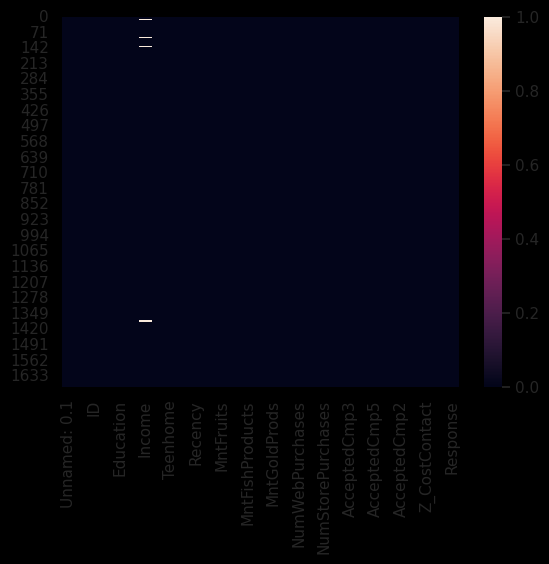

In [ ]:
# Checking for null value using heatmap

sns.heatmap(df.isnull())

Heatmap is graphical representation of data where values are reprented by colors.

Useful for identifying patterns,correlations,especially in dealing with numerical data.

In [ ]:
#check for NaN values in each column

nan_values = df.isna().any()

#print columns with NaN values

columns_with_nan = nan_values[nan_values].index.tolist()
print('columns with NaN values',columns_with_nan)

columns with NaN values ['Income']


In [ ]:
# Dropping columns because they will not contribute anything in model building

df=df.drop(columns=["Unnamed: 0.1" , "Unnamed: 0" , "Z_CostContact", "Z_Revenue"],axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,3,6,5,0,0,0,0,0,0,0


**Correlation and Data Visualization**


*   Correlation is commonly used to identify relationships between variables.
*   It makes predictions based on one varible with other.

*   It selects relevant features for machine learning models
Correlation doesn't imply causation.


<Axes: >

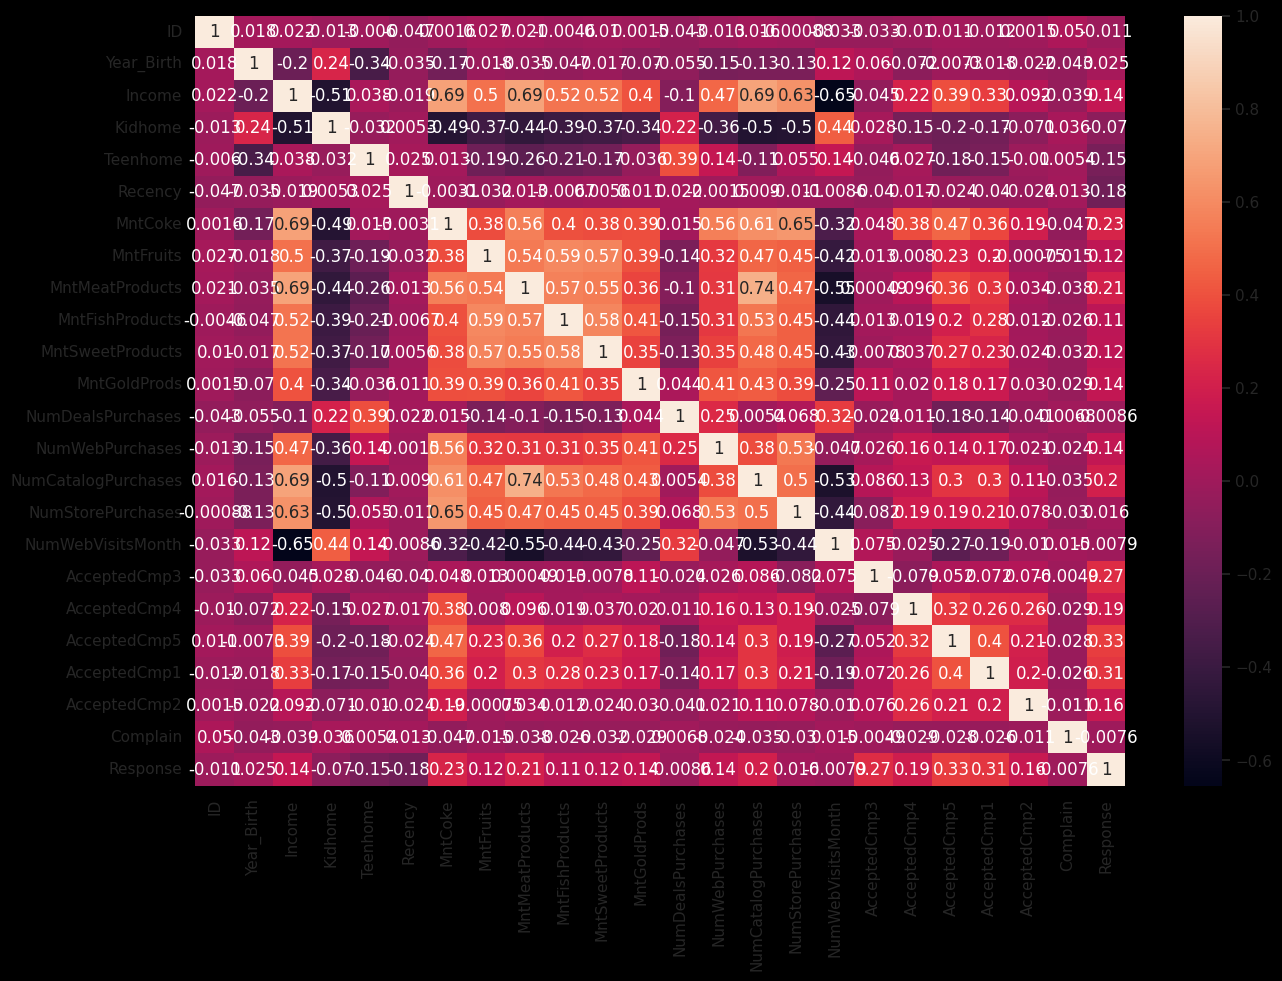

In [ ]:
# Finding the correlation between the feature column

df_numeric = df.select_dtypes(include=["number"])
plt.figure(figsize=(15,10))
sns.heatmap(df_numeric.corr(), annot=True)

Can't drop any column on the basis of correlation because no two columns are too much correlated with each other.

**Preprocessing of the dataset**

In [ ]:
# Filling the missing value in the income by mean

df['Income'] = df['Income'].fillna(df['Income'].mean())
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                 False
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntCoke                False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Response               False
dtype: bool

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Response
0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,635000,...,10,4,7,0,0,0,0,0,0,1
1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,11000,...,1,2,5,0,0,0,0,0,0,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,426000,...,2,10,4,0,0,0,0,0,0,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,11000,...,0,4,6,0,0,0,0,0,0,0
4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,173000,...,3,6,5,0,0,0,0,0,0,0


In [ ]:
# Checking number of unique categories present in the "Marital_Status"

df['Marital_Status'].value_counts()

Marital_Status
Menikah        650
Bertunangan    438
Lajang         360
Cerai          177
Janda           52
Duda             3
Name: count, dtype: int64

In [ ]:
df['Marital_Status'] = df['Marital_Status'].replace(['Menikah', 'Bertunangan'],'relationship')
df['Marital_Status'] = df['Marital_Status'].replace(['Lajang', 'Cerai', 'Janda', 'Duda'],'Single')
# Count of different values present in Marital_Status
#Menikah,Bertunangan are grouping as relationship
#Lajang, Cerai, Janda, Duda are grouping as single
df['Marital_Status'].value_counts()

Marital_Status
relationship    1088
Single           592
Name: count, dtype: int64

In [ ]:
# Combining different dataframe into a single column to reduce the number of dimension

df['Kids'] = df['Kidhome'] + df['Teenhome']
df['Expenses'] = df['MntCoke'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['TotalAcceptedCmp'] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['Response']
df['NumTotalPurchases'] = df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases'] + df['NumDealsPurchases']

In [ ]:
# Deleting some column to reduce dimension and complexity of model

col_del = [ "AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntCoke", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df=df.drop(columns=col_del,axis=1)
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,Complain,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases
0,5524,1957,S1,Single,58138000.0,04-09-2012,58,0,1,0,1617000,1,25
1,2174,1954,S1,Single,46344000.0,08-03-2014,38,0,0,2,27000,0,6
2,4141,1965,S1,relationship,71613000.0,21-08-2013,26,0,0,0,776000,0,21
3,6182,1984,S1,relationship,26646000.0,10-02-2014,26,0,0,1,53000,0,8
4,5324,1981,S3,relationship,58293000.0,19-01-2014,94,0,0,1,422000,0,19


In [ ]:
# Adding a column "Age" in the dataframe

df['Age'] = 2015 - df["Year_Birth"]

In [ ]:
df['Education'].value_counts()

Education
S1     834
S3     373
S2     279
D3     159
SMA     35
Name: count, dtype: int64

In [ ]:
# Changing category into Degree and Non-Degree only

df['Education'] = df['Education'].replace(['S1','S3','S2'],'Degree')
df['Education'] = df['Education'].replace(['D3','SMA'], 'Non-Degree')
#Count different value present in education
#S1,S3,S2 are grouping as degree
#D3,SMA are grouping as Non-degree
df['Education'].value_counts()

Education
Degree        1486
Non-Degree     194
Name: count, dtype: int64

In [ ]:
# Number of days a customer was engaged with company

# Changing Dt_customer into timestamp format
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df['first_day'] = '01-01-2015'
df['first_day'] = pd.to_datetime(df.first_day)
df['day_engaged'] = (df['first_day'] - df['Dt_Customer']).dt.days

In [ ]:
df=df.drop(columns=["ID", "Dt_Customer", "first_day", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df.shape

(1680, 10)

In [ ]:
df.describe()

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,1.680000e+03,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1680.000000
mean,5.201434e+07,0.144048,0.952381,6.039030e+05,0.433333,14.839881,46.152381,538.803571
std,2.137345e+07,0.351243,0.763284,6.017014e+05,0.878074,7.672958,12.027192,201.201805
min,1.730000e+06,0.000000,0.000000,5.000000e+03,0.000000,0.000000,19.000000,186.000000
25%,3.579075e+07,0.000000,0.000000,6.900000e+04,0.000000,8.000000,38.000000,368.000000
50%,5.144550e+07,0.000000,1.000000,3.915000e+05,0.000000,15.000000,45.000000,539.000000
75%,6.789750e+07,0.000000,1.000000,1.035500e+06,1.000000,21.000000,55.000000,714.000000
max,1.623970e+08,1.000000,3.000000,2.525000e+06,5.000000,44.000000,122.000000,885.000000


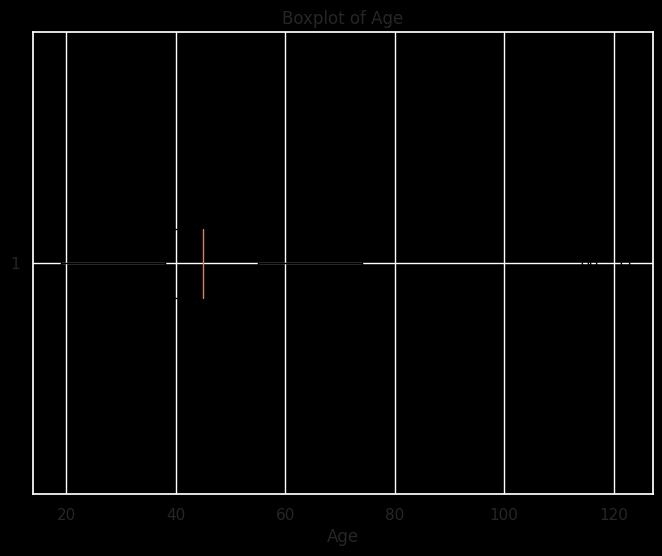

In [ ]:
# Box plot of customer age

plt.figure(figsize=(8, 6))
plt.boxplot(df['Age'], vert=False)  # Create a horizontal boxplot of the 'age' variable
plt.title('Boxplot of Age')
plt.xlabel('Age')
plt.grid(True)
plt.show()

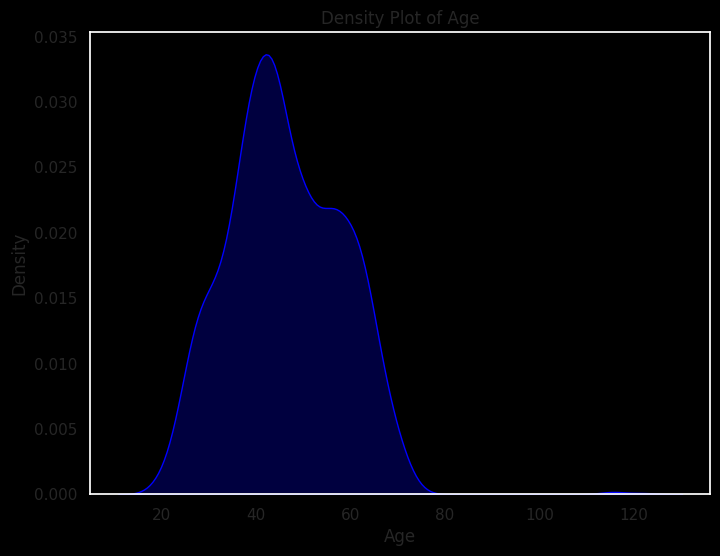

In [ ]:
plt.figure(figsize=(8, 6))
sns.kdeplot(df['Age'], fill=True, color='blue')  # Create a density plot of the 'age' variable
plt.title('Density Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

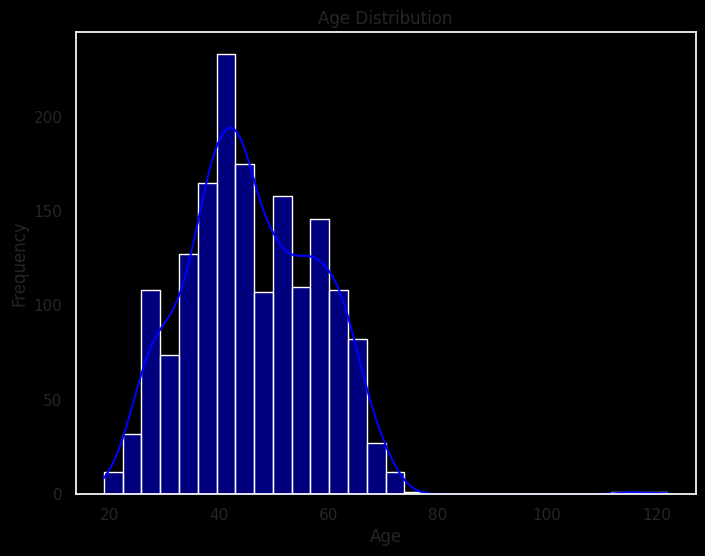

In [ ]:
# Histogram of age distribution

plt.figure(figsize=(8, 6))
sns.histplot(df['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

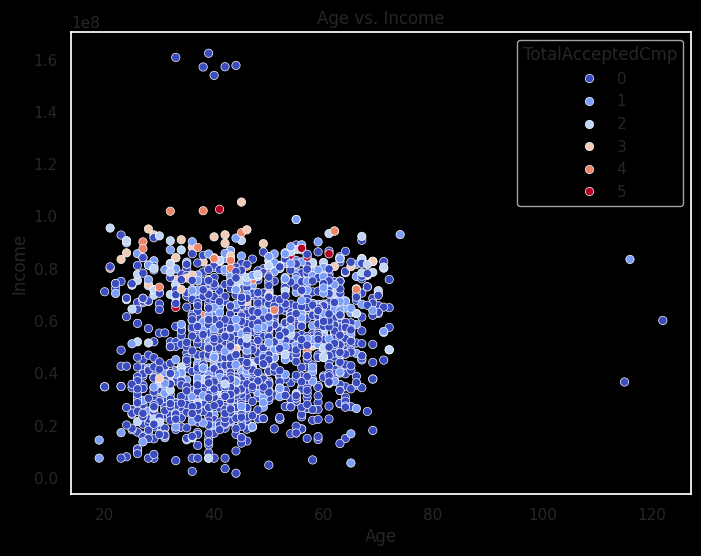

In [ ]:
# Scatter plot of age vs. income

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', data=df, hue='TotalAcceptedCmp', palette='coolwarm')
plt.title('Age vs. Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='TotalAcceptedCmp')
plt.show()

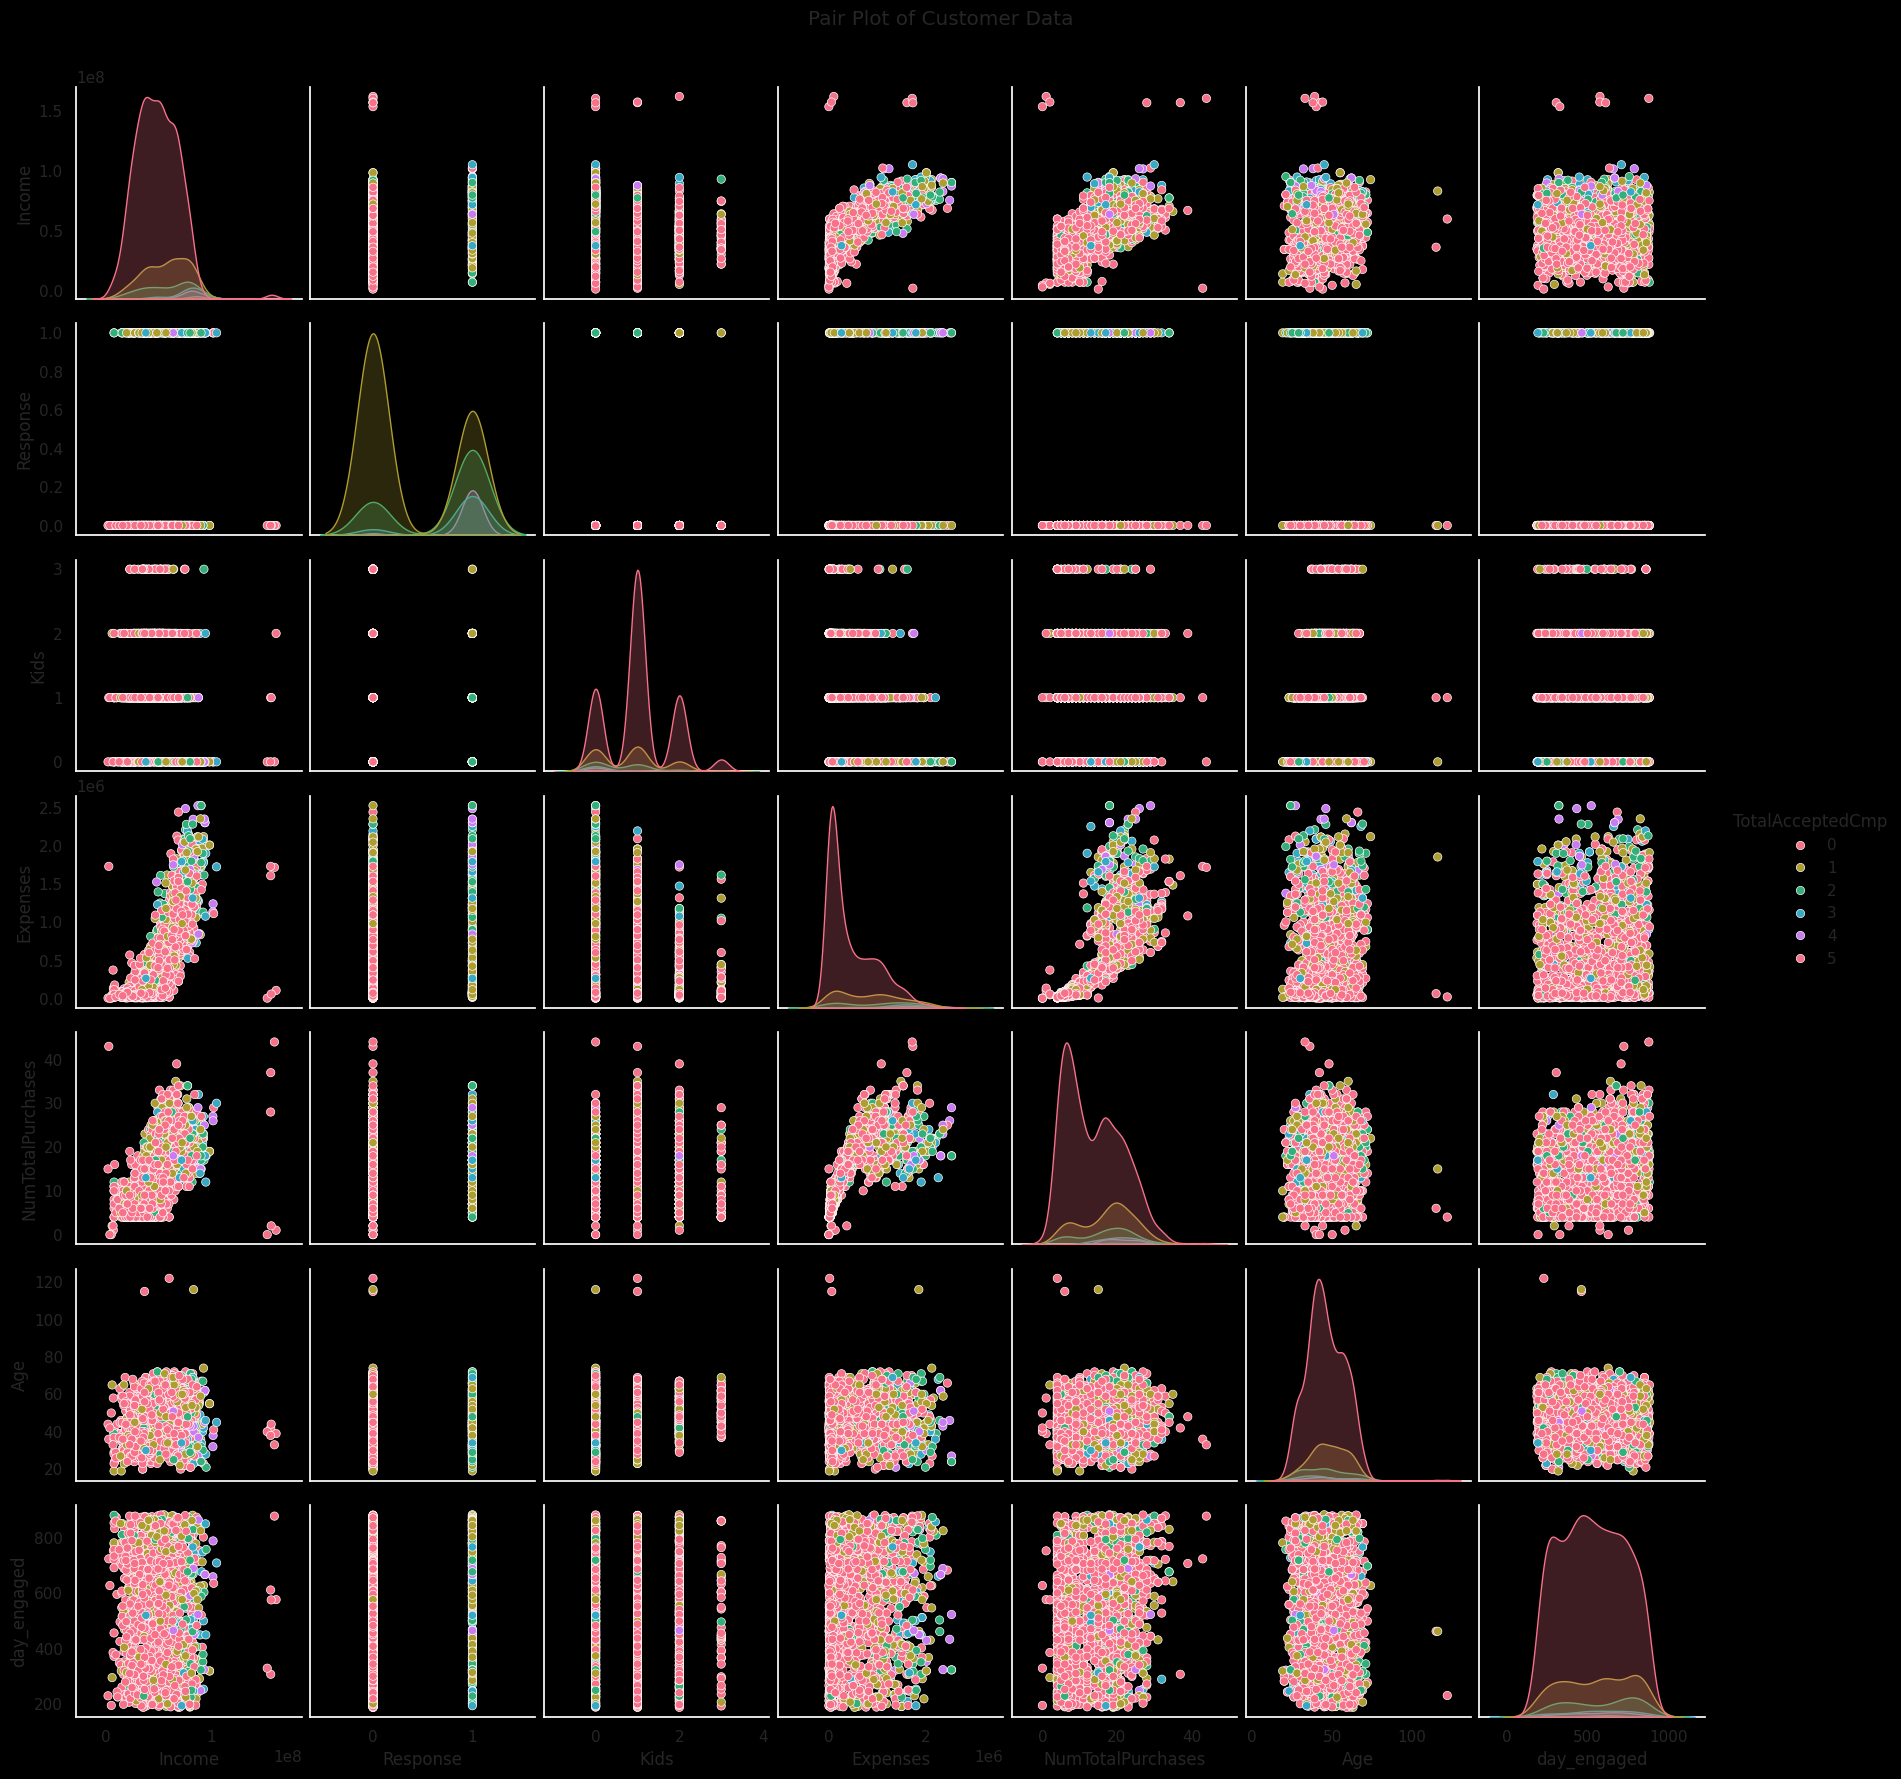

In [ ]:
# Pair plot to visualize relationships between multiple variables
sns.pairplot(df, hue='TotalAcceptedCmp', palette='husl')
plt.suptitle('Pair Plot of Customer Data', y=1.02)
plt.show()

**Visualization**

In [ ]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Education")
fig.show()



*   Based on marital status with expenses,eduction is high in relationship.

*   Less in single


In [ ]:
fig = px.bar(df, x='Marital_Status', y='Expenses', color="Marital_Status")
fig.show()



*   relationship is high in marital status with expenses.

*   And less in single



In [ ]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [ ]:
fig = px.histogram (df, x = "Expenses",  facet_row = "Education",  template = 'plotly_dark')
fig.show ()

In [ ]:
fig = px.histogram (df, x = "NumTotalPurchases",  facet_row = "Education",  template = 'gridon')
fig.show ()

In [ ]:
fig = px.histogram (df, x = "Age",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [ ]:
fig = px.histogram (df, x = "Income",  facet_row = "Marital_Status",  template = 'plotly_dark')
fig.show ()

In [ ]:
fig =  px.pie (df, names = "Marital_Status", hole = 0.7, template = "gridon")
fig.show ()



*   64.8% customers are in relationship.
.
*   less customers with 35.2% are in single



In [ ]:
fig =  px.pie (df, names = "Education", hole = 0.7, template = "plotly_dark")
fig.show ()



*   88.5% customers have degree level education.

*   11.5% customers have non-degree level education



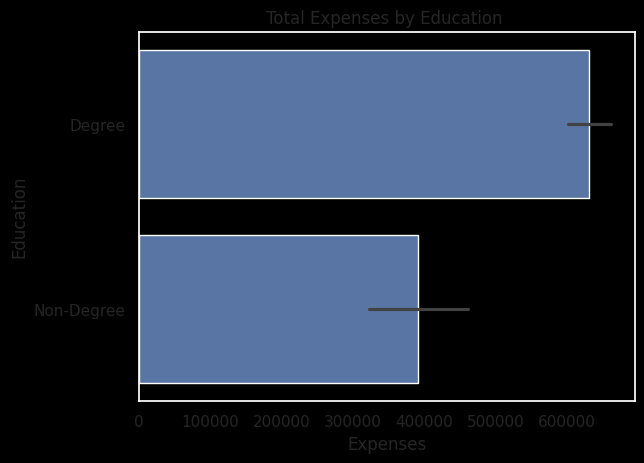

In [ ]:
sns.barplot(x = df['Expenses'],y = df['Education']);
plt.title('Total Expenses by Education ');



*   Total expenses by education is high in degree level.

*   Total expenses by education is low in non-degree level.



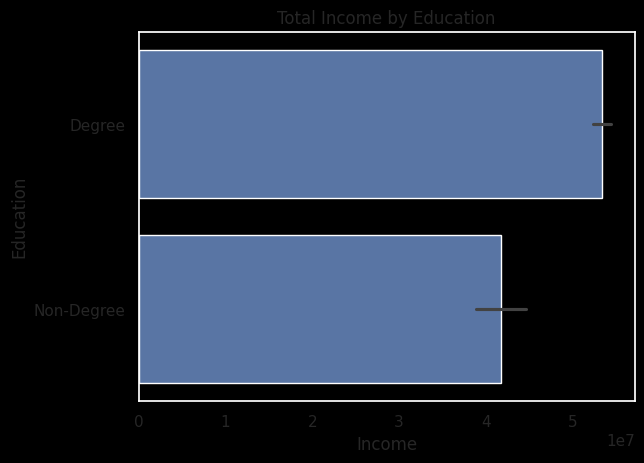

In [ ]:
sns.barplot(x = df['Income'],y = df['Education']);
plt.title('Total Income by Education');



*   Total income by eduaction is high in degree and low in non-degree.




In [ ]:
df.describe()

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
count,1.680000e+03,1680.000000,1680.000000,1.680000e+03,1680.000000,1680.000000,1680.000000,1680.000000
mean,5.201434e+07,0.144048,0.952381,6.039030e+05,0.433333,14.839881,46.152381,538.803571
std,2.137345e+07,0.351243,0.763284,6.017014e+05,0.878074,7.672958,12.027192,201.201805
min,1.730000e+06,0.000000,0.000000,5.000000e+03,0.000000,0.000000,19.000000,186.000000
25%,3.579075e+07,0.000000,0.000000,6.900000e+04,0.000000,8.000000,38.000000,368.000000
50%,5.144550e+07,0.000000,1.000000,3.915000e+05,0.000000,15.000000,45.000000,539.000000
75%,6.789750e+07,0.000000,1.000000,1.035500e+06,1.000000,21.000000,55.000000,714.000000
max,1.623970e+08,1.000000,3.000000,2.525000e+06,5.000000,44.000000,122.000000,885.000000


In [ ]:
df_numeric = df.select_dtypes(include=['float64','int64'])

In [ ]:
df_numeric.head()

,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,58138000.0,1,0,1617000,1,25,58,849
1,46344000.0,0,2,27000,0,6,61,299
2,71613000.0,0,0,776000,0,21,50,498
3,26646000.0,0,1,53000,0,8,31,325
4,58293000.0,0,1,422000,0,19,34,347


In [ ]:
correlation_matrix = df_numeric.corr()

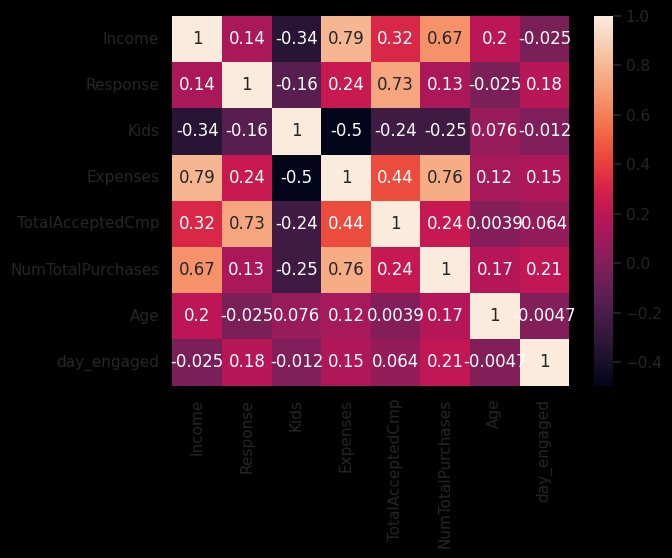

In [ ]:
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [ ]:
cate = []
for i in df.columns:
    if (df[i].dtypes == "object"):
        cate.append(i)

print(cate)

['Education', 'Marital_Status']


In [ ]:
df['Marital_Status'].value_counts()

Marital_Status
relationship    1088
Single           592
Name: count, dtype: int64

**Label Encoding**

In [ ]:
lbl_encode = LabelEncoder()
for i in cate:
    df[i]=df[[i]].apply(lbl_encode.fit_transform)

In [ ]:
data = df.copy()

In [ ]:
data.head()

,Education,Marital_Status,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,58138000.0,1,0,1617000,1,25,58,849
1,0,0,46344000.0,0,2,27000,0,6,61,299
2,0,1,71613000.0,0,0,776000,0,21,50,498
3,0,1,26646000.0,0,1,53000,0,8,31,325
4,0,1,58293000.0,0,1,422000,0,19,34,347


**Standardization**

In [ ]:
scaled_features = StandardScaler().fit_transform(data.values)
scaled_features_df = pd.DataFrame(scaled_features, index=data.index, columns=data.columns)



*   Standardization is a pre-processing technique used to rescale features so that they have a mean of 0 and a standard deviation of 1.

*   Also known as z-score normalization.



In [ ]:
scaled_features_df.head()

,Education,Marital_Status,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.36132,-1.355669,0.286593,2.437652,-1.248112,1.684222,0.645544,1.324541,0.985363,1.542177
1,-0.36132,-1.355669,-0.265378,-0.410231,1.372923,-0.959072,-0.493651,-1.152426,1.234872,-1.192211
2,-0.36132,0.737643,0.917236,-0.410231,-1.248112,0.286102,-0.493651,0.803074,0.320005,-0.202860
3,-0.36132,0.737643,-1.187263,-0.410231,0.062406,-0.915848,-0.493651,-0.891692,-1.260219,-1.062949
4,-0.36132,0.737643,0.293847,-0.410231,0.062406,-0.302404,-0.493651,0.542341,-1.010710,-0.953573


**Elbow method**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

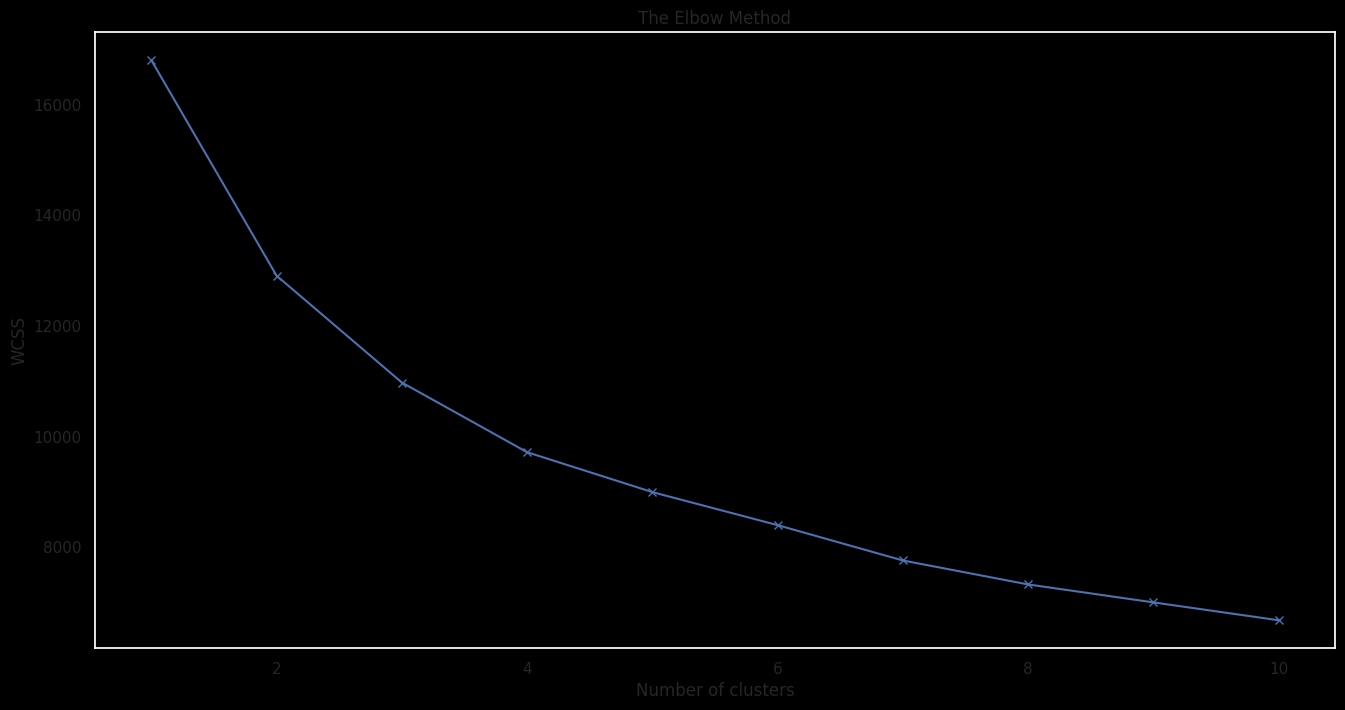

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range (1,11):
 kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
 kmeans.fit(scaled_features_df)
 wcss.append(kmeans.inertia_)
plt.figure(figsize=(16,8))
plt.plot(range(1,11),wcss, 'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

The value of K can't be clearly choose from this elbow method.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will chang

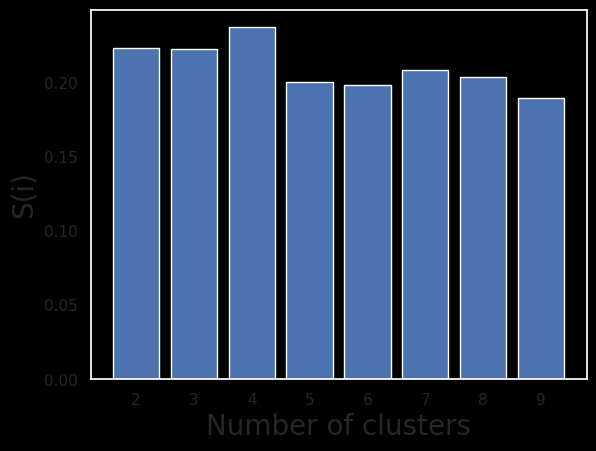

In [ ]:

silhouette_scores = []
for i in range(2,10):
    m1=KMeans(n_clusters=i, random_state=42)
    c = m1.fit_predict(scaled_features_df)
    silhouette_scores.append(silhouette_score(scaled_features_df, m1.fit_predict(scaled_features_df)))
plt.bar(range(2,10), silhouette_scores)
plt.xlabel('Number of clusters', fontsize = 20)
plt.ylabel('S(i)', fontsize = 20)
plt.show()



*   Used to determine the number of clusters.



*   Score closes to 1 indicates that the object is well clustered.

*   Score around 0 indicates overlapping clusters.
*   Score close to -1 indicates that the object might be assigned to the wrong cluster.





Here we are using Silhouette score to measure the value of K


In [ ]:
silhouette_scores

[0.22357873758491195,
 0.2226767679954803,
 0.23724928275963464,
 0.20002946583049291,
 0.19831612832766343,
 0.2087482670704458,
 0.2039047421877868,
 0.18979845571321027]

In [ ]:
# Getting the maximum value of silhouette score and adding 2 in index because index starts from 2.

sc=max(silhouette_scores)
#print(sc)
number_of_clusters=silhouette_scores.index(sc)+2
print("Number of Cluster Required is : ", number_of_clusters)

Number of Cluster Required is :  4


In [ ]:
# Training a predicting by K-Means Algorithm.

kmeans=KMeans(n_clusters=number_of_clusters, random_state=35).fit(scaled_features_df)
pred=kmeans.predict(scaled_features_df)

# Appending those cluster value into main dataframe

df['cluster'] = pred + 1

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
data.head()

,Education,Marital_Status,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,0,0,58138000.0,1,0,1617000,1,25,58,849
1,0,0,46344000.0,0,2,27000,0,6,61,299
2,0,1,71613000.0,0,0,776000,0,21,50,498
3,0,1,26646000.0,0,1,53000,0,8,31,325
4,0,1,58293000.0,0,1,422000,0,19,34,347


In [ ]:
scaled_features_df.head()

,Education,Marital_Status,Income,Response,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
0,-0.36132,-1.355669,0.286593,2.437652,-1.248112,1.684222,0.645544,1.324541,0.985363,1.542177
1,-0.36132,-1.355669,-0.265378,-0.410231,1.372923,-0.959072,-0.493651,-1.152426,1.234872,-1.192211
2,-0.36132,0.737643,0.917236,-0.410231,-1.248112,0.286102,-0.493651,0.803074,0.320005,-0.202860
3,-0.36132,0.737643,-1.187263,-0.410231,0.062406,-0.915848,-0.493651,-0.891692,-1.260219,-1.062949
4,-0.36132,0.737643,0.293847,-0.410231,0.062406,-0.302404,-0.493651,0.542341,-1.010710,-0.953573


In [ ]:
df['Education'].value_counts()

Education
0    1486
1     194
Name: count, dtype: int64



*   0 means Degree and 1 means Non-Degree

*   There are very less customer from Non-Degree background



<ipython-input-124-726cdaab0b73>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


<ipython-input-124-726cdaab0b73>:2: UserWarning:


The palette list has fewer values (3) than needed (4) and will cycle, which may produce an uninterpretable plot.



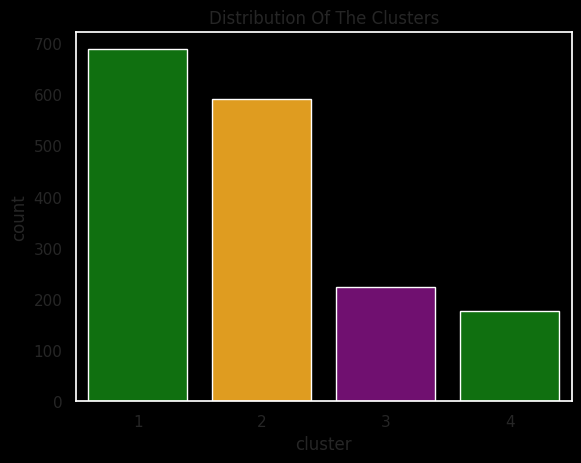

In [ ]:
custom_palette = ["green", "orange", "purple","red"] #"red", "blue",
pl = sns.countplot(x=df["cluster"], palette=custom_palette)
pl.set_title("Distribution Of The Clusters")
plt.show()

As we can see here that weightage of customer are more in cluster1 as compare to other

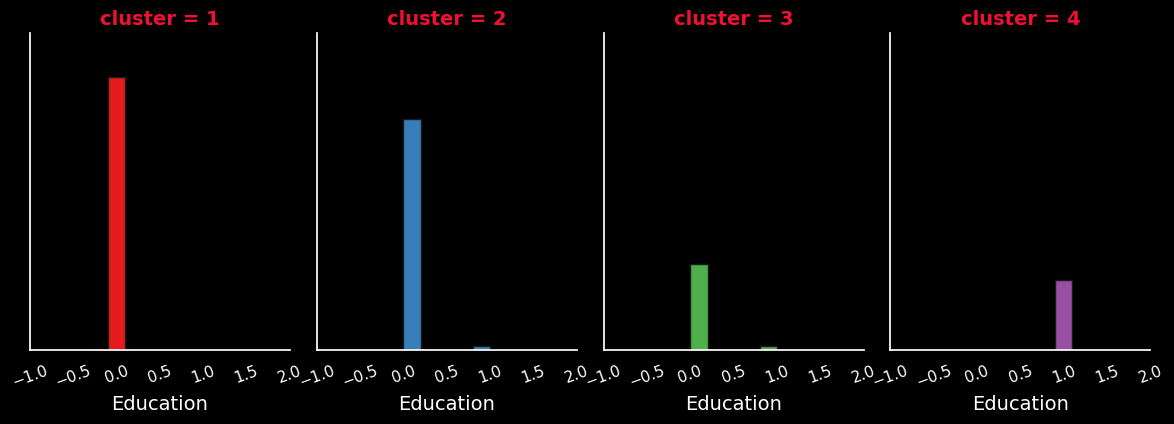

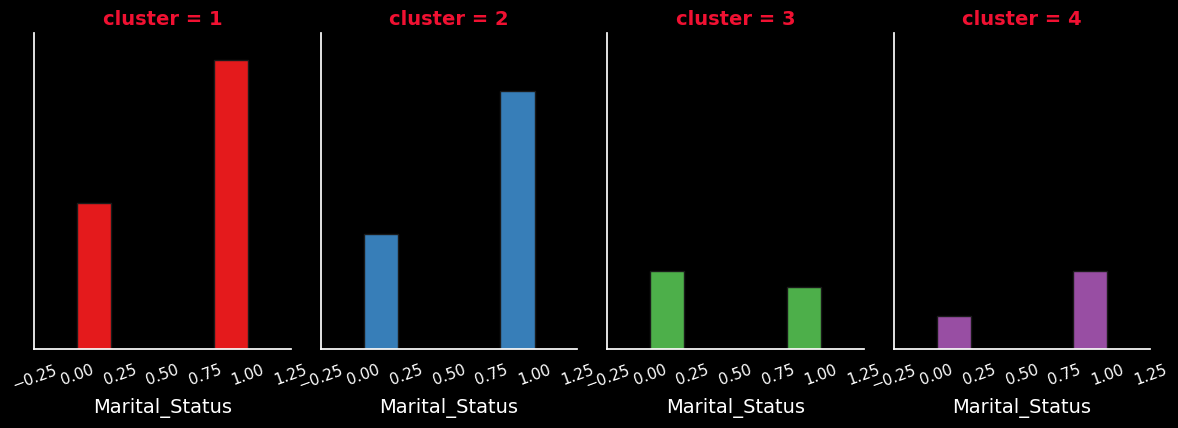

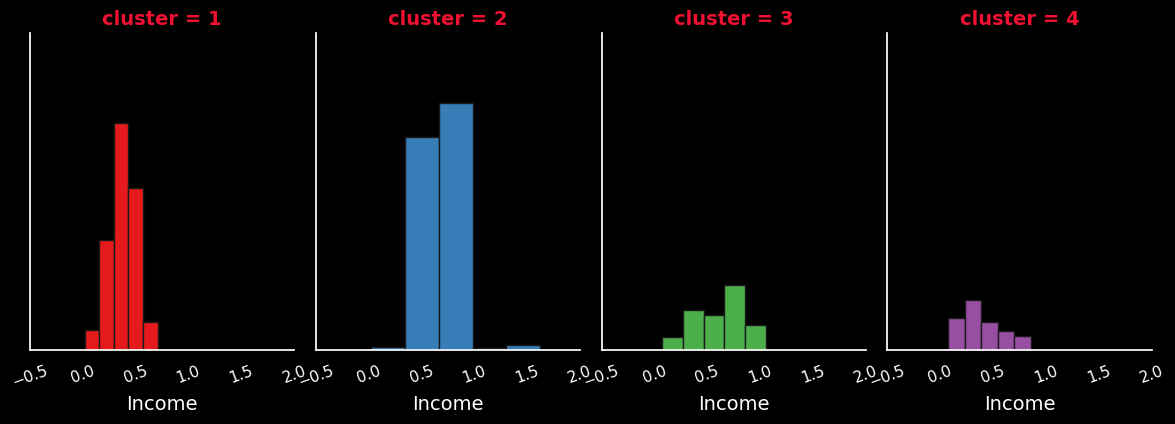

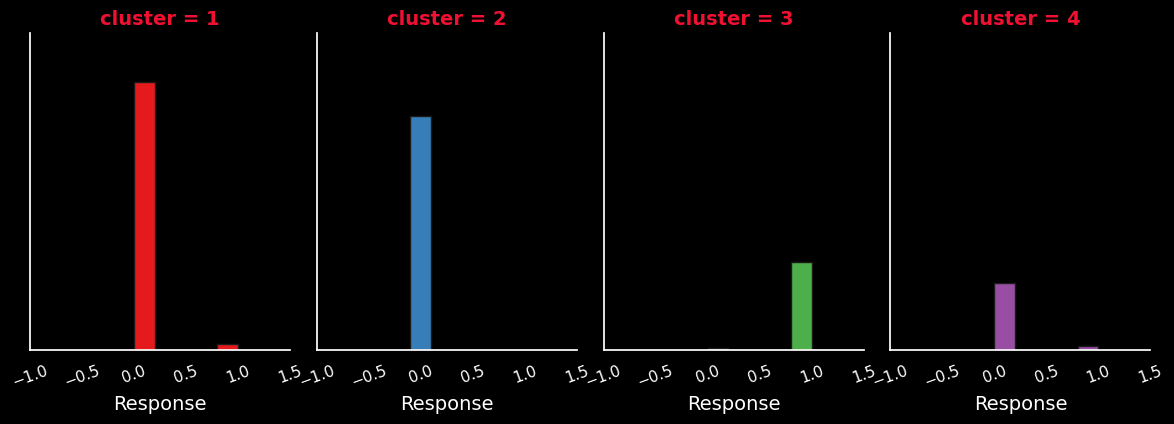

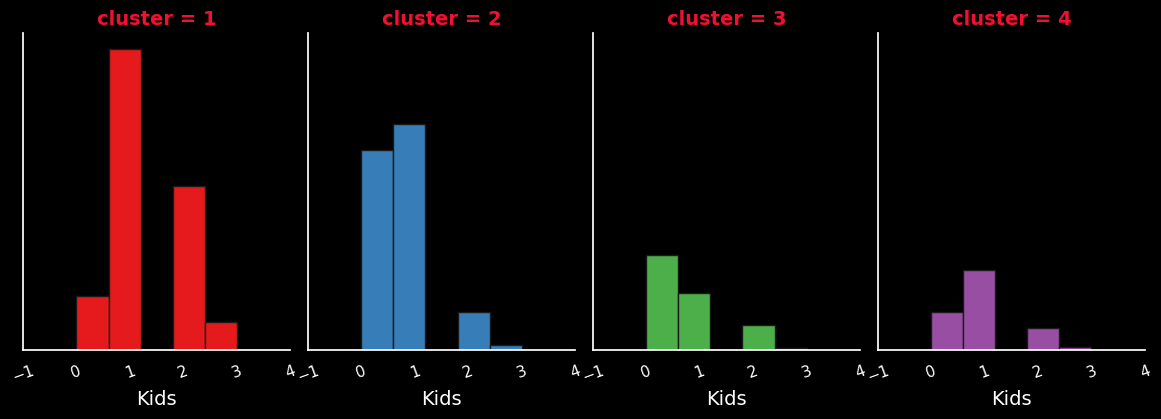

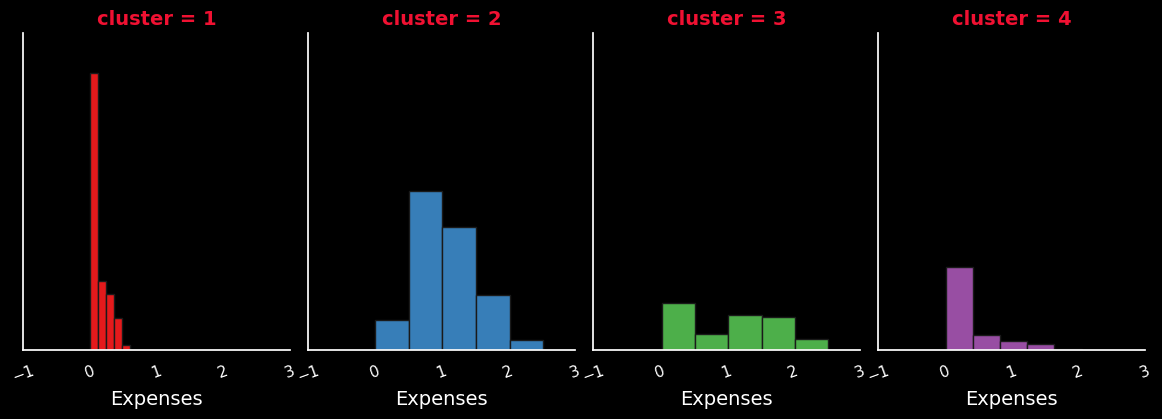

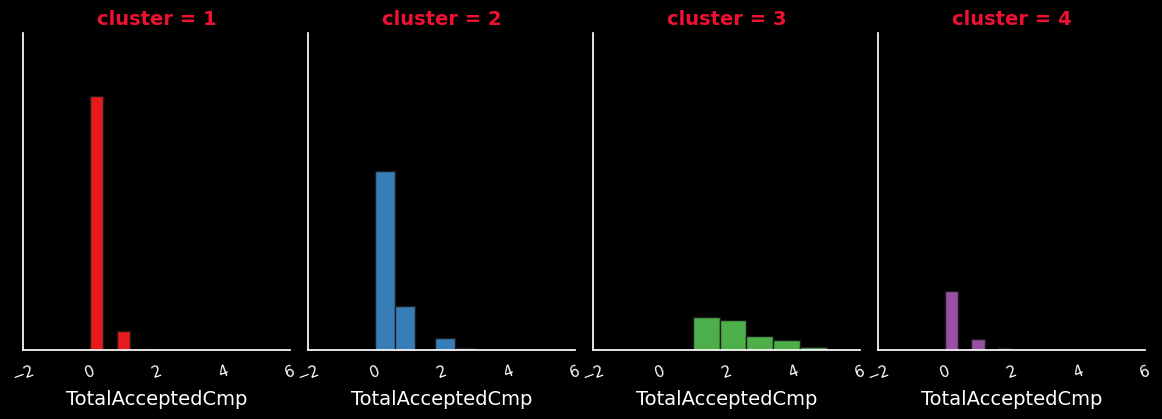

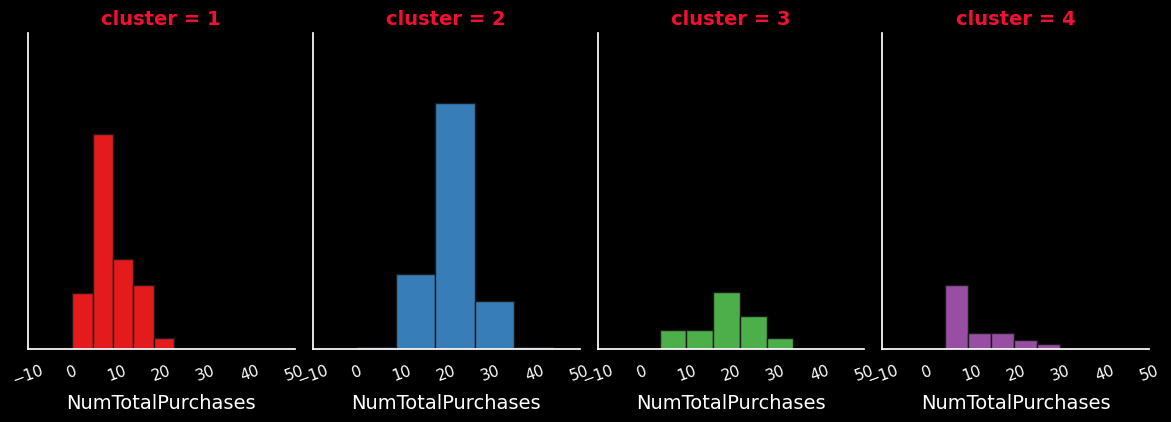

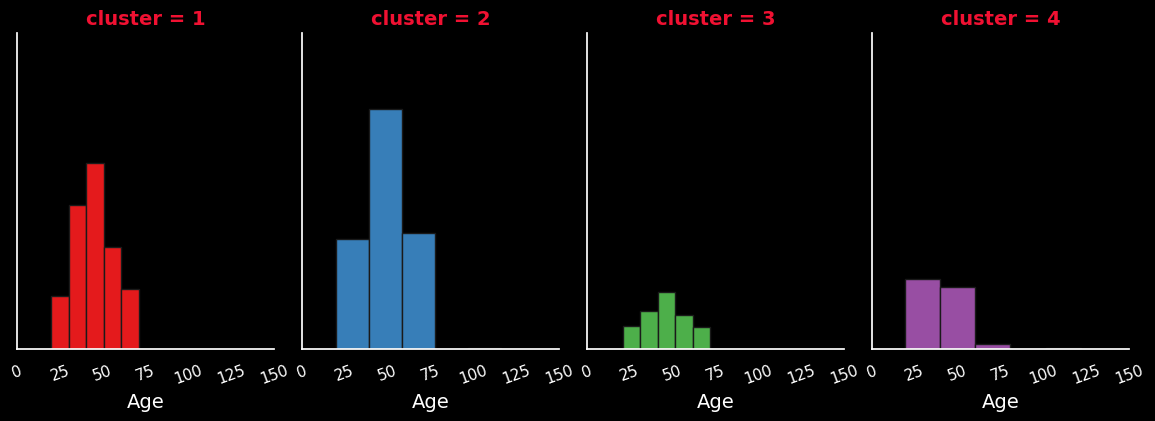

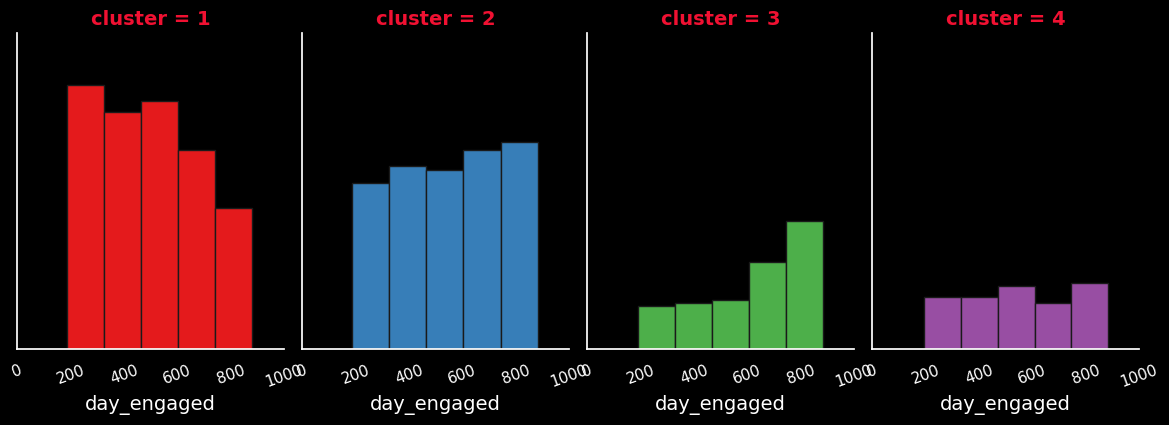

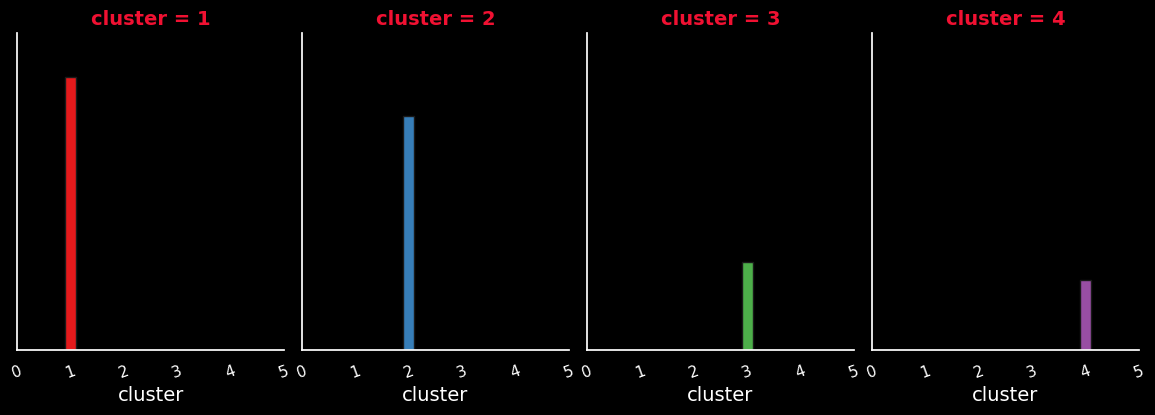

In [ ]:
# Clusters interpretation
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})

for i in df:
    diag = sns.FacetGrid(df, col = "cluster", hue = "cluster", palette = "Set1")
    diag.map(plt.hist, i, bins=5, ec="k")
    diag.set_xticklabels(rotation=20, color = 'white')
    diag.set_yticklabels(color = 'white')
    diag.set_xlabels(size=14, color = 'white')
    diag.set_titles(size=14, color = '#f01132', fontweight="bold")
    diag.fig.set_figheight(5)

In [ ]:
skewAge = data.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.4174702707545747


In [ ]:
skewNumTotalPurchases = data.NumTotalPurchases.skew(axis = 0, skipna = True)
print('NumTotalPurchases skewness: ', skewNumTotalPurchases)

NumTotalPurchases skewness:  0.2795960865856272


<ipython-input-128-64117aaeb2f5>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




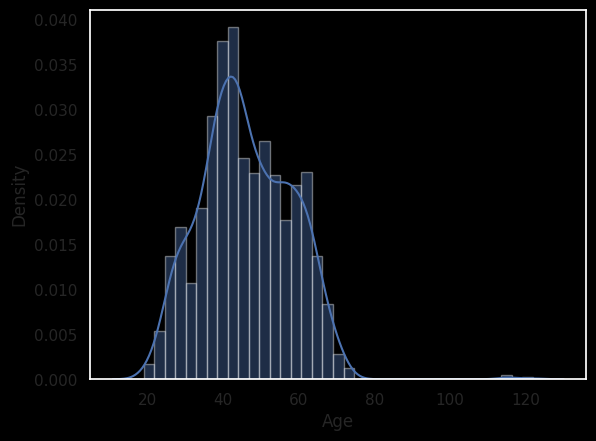

In [ ]:

sns.distplot(data['Age']);

<ipython-input-129-02c5c27d1c21>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




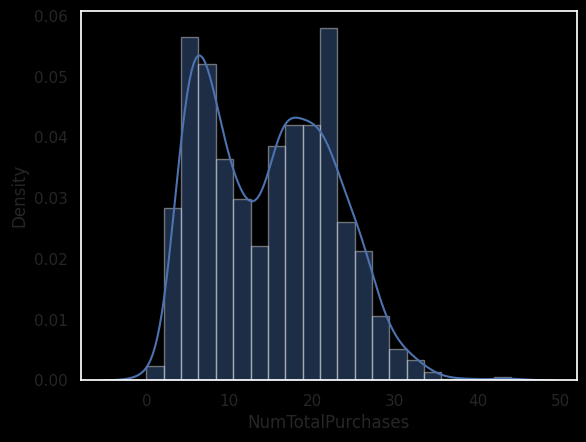

In [ ]:
sns.distplot(data['NumTotalPurchases']);

<ipython-input-130-00766807a468>:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




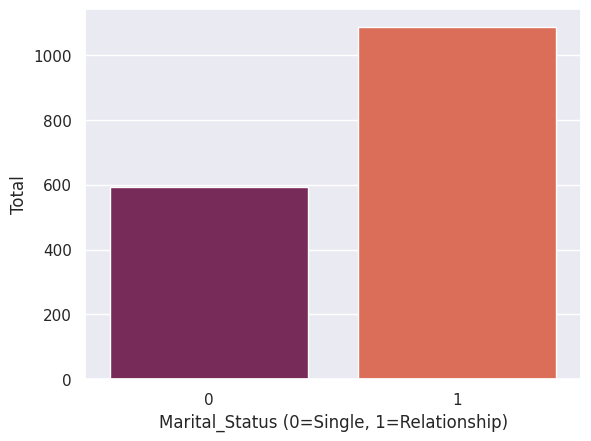

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Marital_Status", data=data, palette="rocket")
plt.xlabel('Marital_Status (0=Single, 1=Relationship)')
plt.ylabel('Total')
plt.show()

**Model Building**

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = data.drop(["Response"], axis=1)
y = data["Response"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train.head()

,Education,Marital_Status,Income,Kids,Expenses,TotalAcceptedCmp,NumTotalPurchases,Age,day_engaged
1635,0,1,59821000.0,1,734000,0,26,60,629
526,0,1,77863000.0,0,1291000,0,20,57,400
1376,0,0,56243000.0,3,396000,0,20,40,367
221,0,1,72460000.0,0,1047000,0,16,46,413
113,0,0,86037000.0,0,730000,3,25,24,729




*   Now we've got our data split into training and test sets, it's time to build a machine learning model.

*   We'll train it (find the patterns) on the training set.
*   And we'll test it (use the patterns) on the test set.

*   We're going to try 3 different machine learning models:
1.Logistic Regression

2.K-Nearest Neighbours Classifier

3.Support Vector machine

4.Decision Tree Classifier

5.Random Forest Classifier

6.XGBoost Classifier



**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.862369    0.464286  0.852891     0.663328      0.804485
recall        0.985075    0.076023  0.852891     0.530549      0.852891
f1-score      0.919647    0.130653  0.852891     0.525150      0.804921
support    1005.000000  171.000000  0.852891  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[990  15]
 [158  13]]

Test Result:
Accuracy Score: 85.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864097   0.363636  0.853175    0.613867      0.793596
recall       0.983834   0.056338  0.853175    0.520086      0.853175
f1-score     0.920086   0.097561  0.853175    0.508824      0.804215
support    433.000000  71.000000  0.853175  504.000000   

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.289116,85.31746


 K-nearest neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 87.24%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.884788    0.661538  0.872449     0.773163      0.852326
recall        0.978109    0.251462  0.872449     0.614786      0.872449
f1-score      0.929112    0.364407  0.872449     0.646759      0.846999
support    1005.000000  171.000000  0.872449  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[983  22]
 [128  43]]

Test Result:
Accuracy Score: 86.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.881250   0.583333  0.867063    0.732292      0.839282
recall       0.976905   0.197183  0.867063    0.587044      0.867063
f1-score     0.926616   0.294737  0.867063    0.610676      0.837601
support    433.000000  71.000000  0.867063  504.000000   

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,K-nearest neighbors,87.244898,86.706349


** Support Vector machine**

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.66%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.996036    1.000000  0.996599     0.998018      0.996612
recall        1.000000    0.976608  0.996599     0.988304      0.996599
f1-score      0.998014    0.988166  0.996599     0.993090      0.996582
support    1005.000000  171.000000  0.996599  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[1005    0]
 [   4  167]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864646   0.444444  0.857143    0.654545      0.805451
recall       0.988453   0.056338  0.857143    0.522395      0.857143
f1-score     0.922414   0.100000  0.857143    0.511207      0.806558
support    433.000000  71.000000  0.857143  504.00000

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Support Vector Machine,99.659864,85.714286


**Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1005.0  171.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[1005    0]
 [   0  171]]

Test Result:
Accuracy Score: 92.66%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.954128   0.750000  0.926587    0.852064      0.925372
recall       0.960739   0.718310  0.926587    0.839524      0.926587
f1-score     0.957422   0.733813  0.926587    0.845618      0.925922
support    433.000000  71.000000  0.926587  504.000000    504.000000
___________________________________________

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Decision Tree Classifier,100.0,92.65873


**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
                0      1  accuracy  macro avg  weighted avg
precision     1.0    1.0       1.0        1.0           1.0
recall        1.0    1.0       1.0        1.0           1.0
f1-score      1.0    1.0       1.0        1.0           1.0
support    1005.0  171.0       1.0     1176.0        1176.0
_______________________________________________
Confusion Matrix: 
 [[1005    0]
 [   0  171]]

Test Result:
Accuracy Score: 93.85%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.963134   0.785714  0.938492    0.874424      0.938140
recall       0.965358   0.774648  0.938492    0.870003      0.938492
f1-score     0.964245   0.780142  0.938492    0.872193      0.938309
support    433.000000  71.000000  0.938492  504.000000    504.000000
___________________________________________

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]],
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
#results_df = results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Random Forest Classifier,100.0,93.849206


**Models Hyperparameter Tuning**

1. Logistic Regression Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params = {"C": np.logspace(-4, 4, 20),
          "solver": ["liblinear"]}

lr_clf = LogisticRegression()

lr_cv = GridSearchCV(lr_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)
best_params = lr_cv.best_params_
print(f"Best parameters: {best_params}")
lr_clf = LogisticRegression(**best_params)

lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters: {'C': 0.0001, 'solver': 'liblinear'}
Train Result:
Accuracy Score: 85.29%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.862369    0.464286  0.852891     0.663328      0.804485
recall        0.985075    0.076023  0.852891     0.530549      0.852891
f1-score      0.919647    0.130653  0.852891     0.525150      0.804921
support    1005.000000  171.000000  0.852891  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[990  15]
 [158  13]]

Test Result:
Accuracy Score: 85.32%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.864097   0.363636  0.853175    0.613867      0.793596
recall       0.983834   0.056338  0.853175    0.520086      0.853175
f1-score  

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

tuning_results_df = pd.DataFrame(
    data=[["Tuned Logistic Regression", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
tuning_results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned Logistic Regression,85.289116,85.31746


2. K-nearest neighbors Hyperparameter Tuning

In [ ]:
train_score = []
test_score = []
neighbors = range(1, 30)

for k in neighbors:
    model = KNeighborsClassifier(n_neighbors=k)
    model.fit(X_train, y_train)
    train_score.append(accuracy_score(y_train, model.predict(X_train)))

Maximum KNN score on the test data: 100.00%


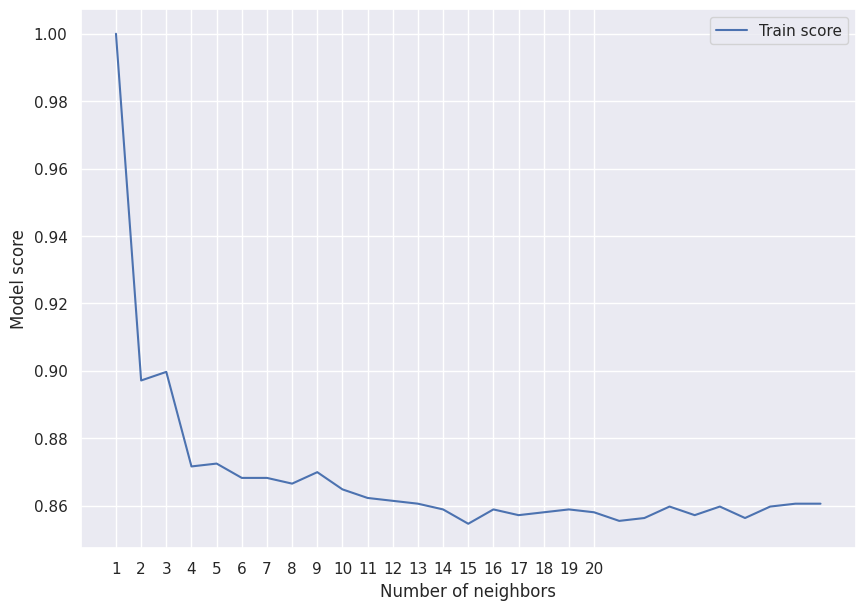

In [ ]:
plt.figure(figsize=(10, 7))

plt.plot(neighbors, train_score, label="Train score")
# plt.plot(neighbors, test_score, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(train_score)*100:.2f}%")

In [ ]:
knn_clf = KNeighborsClassifier(n_neighbors=27)
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.97%
_______________________________________________
CLASSIFICATION REPORT:
                     0           1  accuracy    macro avg  weighted avg
precision     0.869069    0.578947  0.859694     0.724008      0.826883
recall        0.984080    0.128655  0.859694     0.556367      0.859694
f1-score      0.923005    0.210526  0.859694     0.566766      0.819405
support    1005.000000  171.000000  0.859694  1176.000000   1176.000000
_______________________________________________
Confusion Matrix: 
 [[989  16]
 [149  22]]

Test Result:
Accuracy Score: 85.71%
_______________________________________________
CLASSIFICATION REPORT:
                    0          1  accuracy   macro avg  weighted avg
precision    0.872165   0.473684  0.857143    0.672925      0.816030
recall       0.976905   0.126761  0.857143    0.551833      0.857143
f1-score     0.921569   0.200000  0.857143    0.560784      0.819919
support    433.000000  71.000000  0.857143  504.000000   

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned K-nearest neighbors", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
results_df_2

,Model,Training Accuracy %,Testing Accuracy %
0,Tuned K-nearest neighbors,85.969388,85.714286


3. Support Vector Machine Hyperparameter Tuning

In [ ]:
svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)

params = {"C":(0.1, 0.5, 1, 2, 5, 10, 20),
          "gamma":(0.001, 0.01, 0.1, 0.25, 0.5, 0.75, 1),
          "kernel":('linear', 'poly', 'rbf')}

svm_cv = GridSearchCV(svm_clf, params, n_jobs=-1, cv=5, verbose=1, scoring="accuracy")
svm_cv.fit(X_train, y_train)
best_params = svm_cv.best_params_
print(f"Best params: {best_params}")

svm_clf = SVC(**best_params)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Fitting 5 folds for each of 147 candidates, totalling 735 fits


In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Support Vector Machine", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
results_df_2

4. Decision Tree Classifier Hyperparameter Tuning

In [ ]:
params = {"criterion":("gini", "entropy"),
          "splitter":("best", "random"),
          "max_depth":(list(range(1, 20))),
          "min_samples_split":[2, 3, 4],
          "min_samples_leaf":list(range(1, 20))
          }

tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
tree_cv.fit(X_train, y_train)
best_params = tree_cv.best_params_
print(f'Best_params: {best_params}')

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Decision Tree Classifier", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
results_df_2

5. Random Forest Classifier Hyperparameter Tuning

In [ ]:
n_estimators = [500, 900, 1100, 1500]
max_features = ['auto', 'sqrt']
max_depth = [2, 3, 5, 10, 15, None]
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]

params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
              }

rf_clf = RandomForestClassifier(random_state=42)
rf_cv = GridSearchCV(rf_clf, params_grid, scoring="accuracy", cv=5, verbose=1, n_jobs=-1)
rf_cv.fit(X_train, y_train)
best_params = rf_cv.best_params_
print(f"Best parameters: {best_params}")

rf_clf = RandomForestClassifier(**best_params)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(
    data=[["Tuned Random Forest Classifier", train_score, test_score]],
    columns=['Model', 'Training Accuracy %', 'Testing Accuracy %']
)
#tuning_results_df = tuning_results_df.append(results_df_2, ignore_index=True)
results_df_2